In [1]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import networkx as nx


## Connettoma
Carico il file del connettoma. In questo esempio carico la matrice mediata fra i 5 individui del connettoma.

Il connettoma è qui inteso come un _undirected graph_ dove i pesi tra i nodi, altresì detti _edges_, rappresentati nella matrice di adiacenza $$M_{i,j}=M_{j,i}\, \forall i,j$$
dando dunque luogo ad una matrice simmetrica

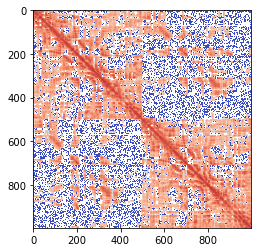

Dimensions: (998, 998)


In [2]:
# Load connectome from file
M=np.loadtxt("../Data/connectivity_matrix/group_mean_connectivity_matrix_file.txt")

#Show the connectome matrix M
plt.imshow(M,norm=colors.LogNorm(vmin=M.min(), vmax=M.max()),cmap='coolwarm')
plt.show()
print("Dimensions:", M.shape)

## Considerazioni sul connettoma
### Diagonali nulle

In [3]:
#All diagonal elements are set to 0.0
for i in range(M.shape[0]):
    if M[i,i]!=0:
        print(M[i,i])
    else:
        pass

### Distribuzione di in-degree per tutti i nodi

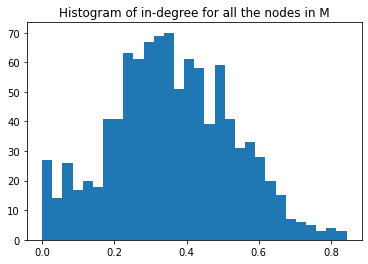

In [10]:
_=plt.hist(M.sum(axis=0),30)
plt.title("Histogram of in-degree for all the nodes in M")
plt.show()

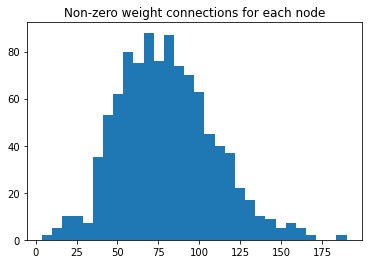

In [20]:
_=plt.hist(np.count_nonzero(M, axis=0),30)
plt.title("Non-zero-weight connections for each node")
plt.show()

In [5]:
# Graphics stuff

#graph=nx.from_numpy_matrix(M)
#nx.draw(graph)
#nx.to_edgelist(graph)
#nx.write_gexf(graph, "test.gexf")

## Normalizzazione
Si procede come suggerito nel paper Rocha et al. alla normalizzazione della matrice di adiacenza secondo la seguente:
$$\widetilde{M_{ij}}=\frac{M_{ij}}{\sum_j M_{ij}}$$

In [6]:
#Sum is carried out through every i-th line in the M matrix
#and then put to the "vertical" form
#so as to every i-th line is divided by the right sum
nor_M=M/M.sum(axis=1)[:,None]